## **Practical Lab 7**
### *Performance Metrics for Classification Problems*

**Problem Definition**

The task is to develop a robust SVM (Support Vector Machine) classifier capable of accurately recognizing handwritten digits from the MNIST dataset.

In [135]:
from sklearn.datasets import fetch_openml
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report,precision_score, recall_score, f1_score, precision_recall_curve
import pandas as pd
import seaborn as sns


In [136]:
mnist = fetch_openml('mnist_784',as_frame=False, parser='auto')

## __Exploratory Data Analysis (EDA)__

### Description of dataset

In [137]:
print(mnist.DESCR)

**Author**: Yann LeCun, Corinna Cortes, Christopher J.C. Burges  
**Source**: [MNIST Website](http://yann.lecun.com/exdb/mnist/) - Date unknown  
**Please cite**:  

The MNIST database of handwritten digits with 784 features, raw data available at: http://yann.lecun.com/exdb/mnist/. It can be split in a training set of the first 60,000 examples, and a test set of 10,000 examples  

It is a subset of a larger set available from NIST. The digits have been size-normalized and centered in a fixed-size image. It is a good database for people who want to try learning techniques and pattern recognition methods on real-world data while spending minimal efforts on preprocessing and formatting. The original black and white (bilevel) images from NIST were size normalized to fit in a 20x20 pixel box while preserving their aspect ratio. The resulting images contain grey levels as a result of the anti-aliasing technique used by the normalization algorithm. the images were centered in a 28x28 image b

In [138]:
X = mnist['data']
y = mnist['target']

print(f'Size of dataset is: {len(X)}')

Size of dataset is: 70000


### Sample Images

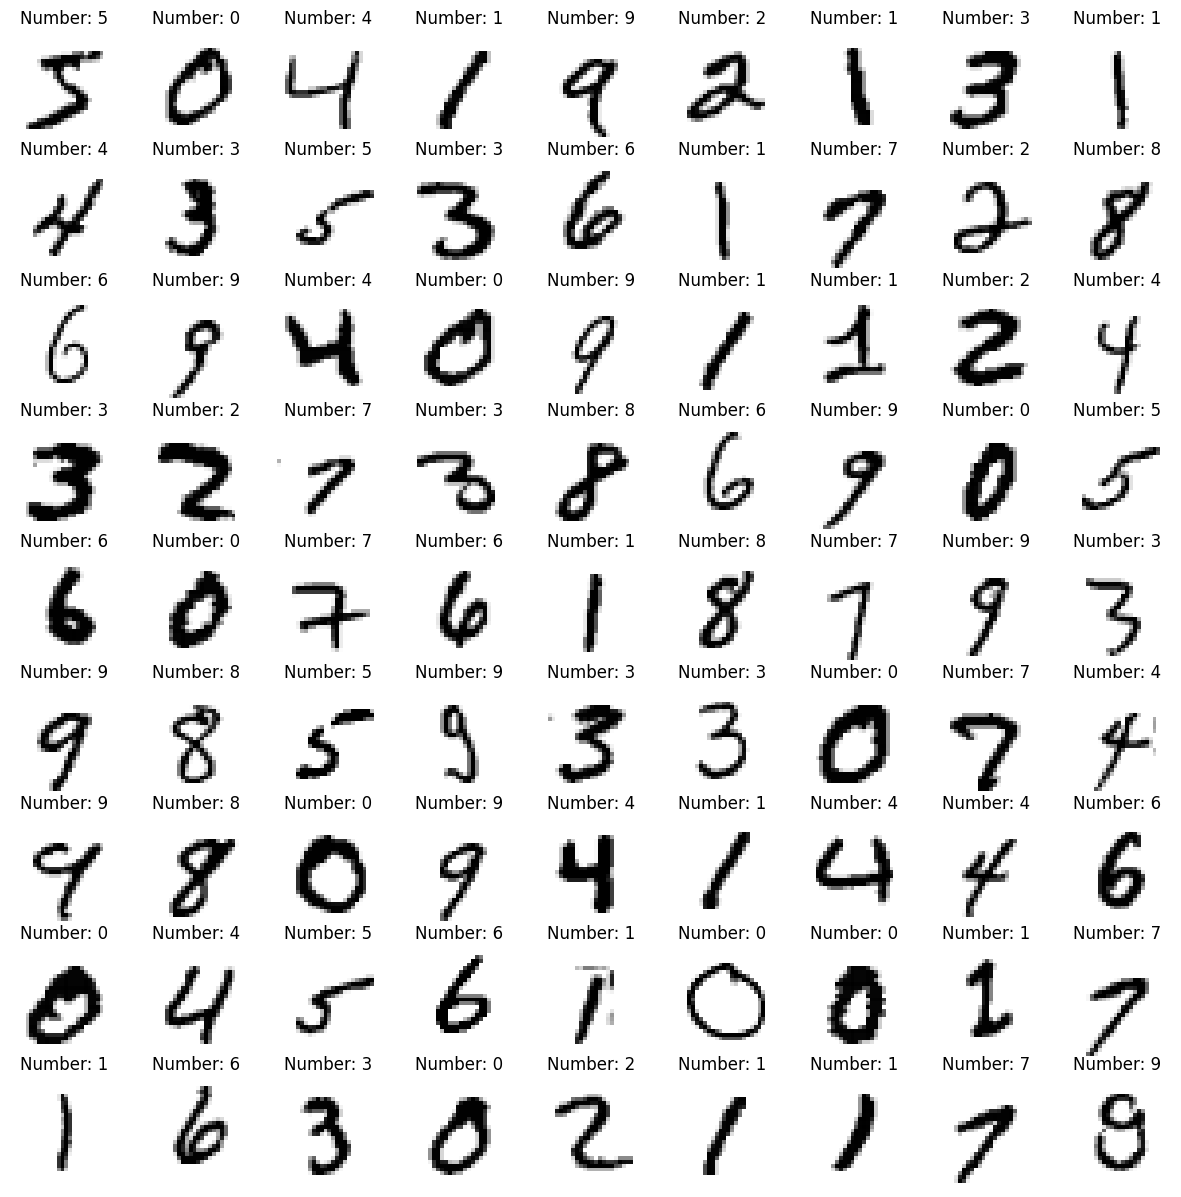

In [139]:
fig, axes = plt.subplots(9, 9, figsize=(15, 15))

for i, ax in enumerate(axes.flat):
    ax.imshow(np.array(X[i]).reshape(28, 28), cmap='binary')
    ax.axis('off')
    ax.set_title(f"Number: {y[i]}")

plt.show()

## __Split Dataset__

Splitting dataset into training, validation, and test dataset with ratio of 70:15:15



In [140]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=95)
X_test, X_validation, y_test, y_validation = train_test_split(X_test, y_test, test_size=0.5, random_state=95)

print("Shape of X_train:", len(X_train))
print("Shape of X_val:", len(X_validation))
print("Shape of X_test:", len(X_test))

Shape of X_train: 49000
Shape of X_val: 10500
Shape of X_test: 10500


## __Model Selection and Training__

In [141]:
svm_classifier = SVC(random_state=95)
svm_classifier.fit(X_train, y_train)


SVC(random_state=95)

## __Model Evaluation on Validation Set__


In [142]:
y_validation_prediction = svm_classifier.predict(X_validation)


### Accuracy on validation set:

In [143]:
accuracy_score(y_validation, y_validation_prediction)

0.9800952380952381

### Confusion Matrix

In [144]:
confusion_matrix(y_validation, y_validation_prediction)

array([[1041,    0,    2,    0,    0,    1,    3,    1,    2,    1],
       [   0, 1181,    3,    2,    0,    1,    0,    1,    1,    2],
       [   1,    2, 1052,    0,    6,    0,    1,    3,    3,    2],
       [   2,    1,    7, 1028,    0,   10,    0,    5,    7,    2],
       [   1,    2,    1,    0, 1000,    0,    1,    2,    2,   12],
       [   0,    0,    2,    4,    2,  924,    2,    1,    2,    3],
       [   2,    1,    0,    0,    0,    1, 1027,    0,    2,    0],
       [   0,    3,    5,    1,    7,    0,    0, 1075,    1,    9],
       [   1,    3,    3,    1,    1,    6,    2,    1,  969,    3],
       [   4,    2,    1,    7,   13,    1,    1,   15,    3,  994]],
      dtype=int64)

### Classification report

In [145]:
print(classification_report(y_validation_prediction, y_validation_prediction))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00      1052
           1       1.00      1.00      1.00      1195
           2       1.00      1.00      1.00      1076
           3       1.00      1.00      1.00      1043
           4       1.00      1.00      1.00      1029
           5       1.00      1.00      1.00       944
           6       1.00      1.00      1.00      1037
           7       1.00      1.00      1.00      1104
           8       1.00      1.00      1.00       992
           9       1.00      1.00      1.00      1028

    accuracy                           1.00     10500
   macro avg       1.00      1.00      1.00     10500
weighted avg       1.00      1.00      1.00     10500



### Precision, Recall, and F1 Score

In [146]:
precision_scores = precision_score(y_validation, y_validation_prediction, average=None)
recall_scores = recall_score(y_validation, y_validation_prediction, average=None)
f1_scores = f1_score(y_validation, y_validation_prediction, average=None)

list_precision_scores = []
list_recall_scores = []
list_f1_scores = []

for i, cls in enumerate(range(10)):
    list_precision_scores.append(precision_scores[i])
    list_recall_scores.append(recall_scores[i])
    list_f1_scores.append(f1_scores[i])
    
df_scores =  pd.DataFrame({"Class":range(10), "Precision Score":list_precision_scores, "Recall Score": list_recall_scores, "F1 Score":list_recall_scores})
df_scores


,Class,Precision Score,Recall Score,F1 Score
0,0,0.989544,0.990485,0.990485
1,1,0.988285,0.991604,0.991604
2,2,0.977695,0.983178,0.983178
3,3,0.985618,0.967985,0.967985
4,4,0.971817,0.979432,0.979432
5,5,0.978814,0.982979,0.982979
6,6,0.990357,0.994192,0.994192
7,7,0.973732,0.976385,0.976385
8,8,0.976815,0.978788,0.978788
9,9,0.966926,0.954851,0.954851


### __Precision-Recall Curve for class 5__


<Axes: >

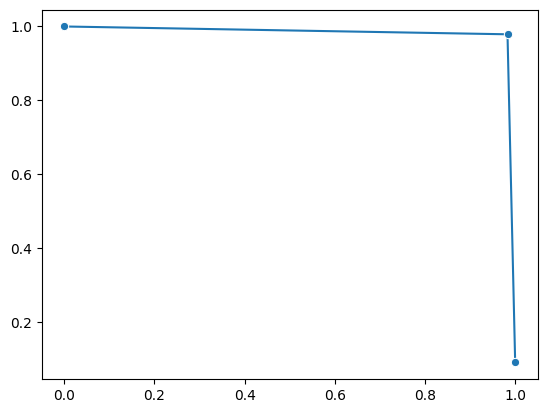

In [147]:
precision, recall, _ = precision_recall_curve(y_validation == '5', (y_validation_prediction == '5'))

sns.lineplot(x=recall, y=precision, marker='o')


## Insiights

The SVM classifier performed well in the validation dataset. It had an accuracy of 98.01% and showed minimal misclassifications. The precision, recall, and F1 scores were near-perfect for all classes. Overall, it did an excellent job recognizing and classifying handwritten digits. It's suitable for real-world digit recognition tasks.

## __Testing__

In [148]:
y_test_prediction = svm_classifier.predict(X_test)

### Accuracy on test set

In [149]:
accuracy_score(y_test, y_test_prediction)

0.9789523809523809

### Confusion Matrix

In [150]:
confusion_matrix(y_test, y_test_prediction)

array([[1012,    2,    0,    0,    1,    2,    3,    0,    3,    1],
       [   0, 1181,    5,    0,    1,    0,    1,    0,    1,    1],
       [   1,    1, 1028,    3,    2,    0,    0,    3,    2,    2],
       [   2,    0,    8, 1058,    0,    9,    0,    4,    8,    4],
       [   1,    2,    0,    0,  999,    1,    4,    2,    1,    8],
       [   1,    1,    1,    9,    4,  908,    5,    0,    1,    2],
       [   7,    0,    0,    0,    3,    6, 1005,    0,    1,    0],
       [   2,    5,    8,    1,    3,    1,    0, 1079,    1,    5],
       [   0,    7,    3,    8,    1,    7,    4,    1,  992,    2],
       [   4,    4,    0,    5,   12,    0,    0,    5,    2, 1017]],
      dtype=int64)

### Classification Report

In [151]:
print(classification_report(y_test, y_test_prediction))

              precision    recall  f1-score   support

           0       0.98      0.99      0.99      1024
           1       0.98      0.99      0.99      1190
           2       0.98      0.99      0.98      1042
           3       0.98      0.97      0.97      1093
           4       0.97      0.98      0.98      1018
           5       0.97      0.97      0.97       932
           6       0.98      0.98      0.98      1022
           7       0.99      0.98      0.98      1105
           8       0.98      0.97      0.97      1025
           9       0.98      0.97      0.97      1049

    accuracy                           0.98     10500
   macro avg       0.98      0.98      0.98     10500
weighted avg       0.98      0.98      0.98     10500



## __Conclusion__

The SVM classifier is impressive for digit recognition! It achieved over 97% accuracy on both the validation and test datasets. The precision, recall, and F1 scores were consistently high for all classes. It also had minimal misclassifications. Its accuracy and precision are ideal for digit recognition tasks and can be relied upon in real-world applications.

